# Investigating COVID-19 Impact on Flights Delay Time For The Top 4 Airlines in US
## By: Zaid Ghazal

## Investigation Overview

> www.transtats.bts.gov is a website contains various datasets for transportation means details. In this notebook, python popular data analysis packages are used to investigate the COVID-19 effect on flights and the airlines on-time performance for the top 4 airlines (carriers) in US. The data records are taken in May-2018, May-2019, and May-2020. The purpose is to compare 2018 and 2019 May season with the former in 2020 (during the global crisis). There are three datasets (one for each year) that need assessing cleaning. Also, they should be combined first in one DataFrame.

## Dataset Overview

> The chosen dataset contains 11 columns, 6 of them are interesting features. Each record represents a flight between US states. All flights are on May but in different years (2018, 2019, and 2020). The columns and interesting features are illustrated as following (each is defined by the column name):
- `YEAR`: The year of flight (2018, 2019, or 2020).
- `MONTH`: The month of flight (all 5 (May)).
- `OP_UNIQUE_CARRIER` (carrier code) : Unique Carrier Code. Each code represents   a specific carrier (airline). For example, AA for American Airlines Inc.
- `ORIGIN_STATE_NM` (departure state name): Origin State Name.
- `DEST_STATE_NM` (arrival state name): Destination State Name.
- `DEP_DELAY`: Difference in minutes between scheduled and actual departure time.              Early departures show negative numbers.
- `DEP_DEL15`: If the flight delayed more than 15 minutes on departure, the value will be (1), else (0).
- `ARR_DELAY`: Difference in minutes between scheduled and actual arrival time.                Early arrivals show negative numbers.
- `ArrDel15`: If the flight delayed more than 15 minutes on arrival, the value will be (1), else (0).
- `CANCELLED`: If the flight is canceled, the value will be (1), else (0).
- `DISTANCE`: Distance between airports (miles).		

The interesting feature are: `YEAR`, `OP_UNIQUE_CARRIER`, `DEP_DELAY`, `ARR_DELAY`, `CANCELLED`, and `DISTANCE`


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('all_flights.csv')
df_canelled = pd.read_csv('cancelled flights.csv')

In [3]:
def plotDelayHist(x='',bins=np.arange(0,2105+60,60), ylog=False,title='',xlabel='Delay in Minutes (each bin 60 min )'):
   
   delay_df = df[df[x] >= 0]
   g = sb.FacetGrid(data= delay_df, col='year')
   g.map(plt.hist,x,bins=bins,edgecolor='w')
  
   if (ylog):
     g.set(yscale=('log'))
     y_max=1000000
     ticks = [y_max/100000,y_max/10000, y_max/1000, y_max/100, y_max/10, y_max] 
     g.set(yticks = ticks, yticklabels=ticks)   
  
   g.set(ylabel='Flights Count')  
   g.set(xlabel= xlabel)  

   plt.subplots_adjust(top=0.8) # Change the title position
   g.fig.suptitle(title)
# Draw multi-histograms using `seaborn` library and apply log scale on y axis to visualize the data better         

## (Visualization 1)

### How do the delay durations distributed on may among the three years?

>The delay on DEPARTURE seems to be skewed to the right with most flights fall in [0,59] minutes interval. However, the year 2020 had less overall flights count and delay durations, accordingly.
The delay on ARRIVAL seems also to be skewed to the right with most flights fall in [0,59] minutes interval. However, the year 2020 had less overall flights count and delay durations, accordingly. Consequently, the flights delayed on departure would have almost the same amount of delay on arrival.

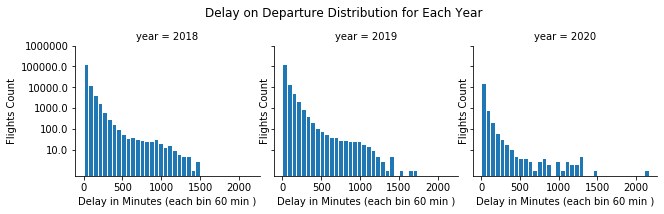

In [4]:
plotDelayHist(x='departure_delay', ylog=True, title='Delay on Departure Distribution for Each Year')
# each bin refers to 60 minutes delay (0-59),(60-119) ...etc. the bin height represent the number of flights with delay falls in the bin's interval

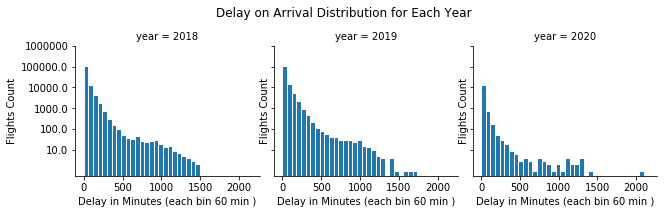

In [5]:
plotDelayHist(x='arrival_delay', ylog=True, title='Delay on Arrival Distribution for Each Year')
# each bin refers to 60 minutes delay (0-59),(60-119) ...etc. the bin height represent the number of flights with delay falls in the bin's interval

## (Visualization 2)

### What is the relation between the traveled distance and delay on departure?
> As shown on the first plot (`Delay on Departure Duration VS Traveling Distance`), the relation between the delay on departure and the distance traveled seems to be centered. That means most of departure delays fall in the interval [0,500] (in minutes) and appear on the flights with traveled distance between 100 and 3000 miles.

### How does the cancellation rate changed over the 3 years (especially after COVID-19) ?
> On the second plot (`Flights Cancellation Proportion for Each Year`), the Cancellation rate is increasing annually by approximately 1.5%. Appearently, this increasing is the same in 2019 and 2020 despite of the COVID-19 impact. This might be as a result of the low flights number in 2020.

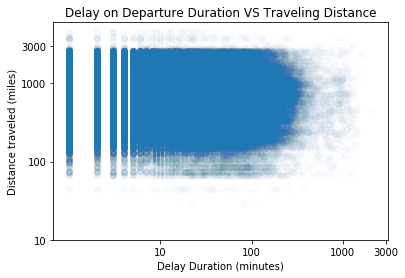

In [13]:
from matplotlib.ticker import StrMethodFormatter

ylog = np.log10(df[df.departure_delay>0].distance)
xlog = np.log10(df[df.departure_delay>0].departure_delay)
plt.scatter( x=xlog, y=ylog, alpha=1/100)


locs, labels = plt.yticks()
# plt.xticks(np.arange(0,4,1), 10**np.arange(0,4,1));
plt.yticks(np.log10(np.arange(500,5000,500)), np.arange(500,5000,500));
locs = np.array([1,2,3,np.log10(3000)]);
plt.yticks(locs, (10**locs).astype('int32'));
plt.xticks(locs, (10**locs).astype('int32'));
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Distance traveled (miles)');
plt.title('Delay on Departure Duration VS Traveling Distance');
# Plot distance VS delay duration (on departure) with applying log10 transformation on both axes and transparency effect

In [7]:
df_canelled

,year,carrier,departure_state,arrival_state,departure_delay,departure_over15_delay,arrival_delay,arrival_over15_delay,cancelled,distance
0,2018,SkyWest Airlines,Illinois,Michigan,NaN,NaN,NaN,NaN,1,235
1,2018,SkyWest Airlines,Illinois,Tennessee,-6.0,0.0,NaN,NaN,1,409
2,2018,SkyWest Airlines,Tennessee,Illinois,NaN,NaN,NaN,NaN,1,409
3,2018,SkyWest Airlines,Illinois,Tennessee,54.0,1.0,NaN,NaN,1,409
4,2018,SkyWest Airlines,Illinois,Illinois,NaN,NaN,NaN,NaN,1,130
...,...,...,...,...,...,...,...,...,...,...
15551,2020,Delta Air Lines,Utah,California,NaN,NaN,NaN,NaN,1,584
15552,2020,Delta Air Lines,Utah,California,NaN,NaN,NaN,NaN,1,584
15553,2020,Delta Air Lines,Washington,Nevada,NaN,NaN,NaN,NaN,1,867
15554,2020,Delta Air Lines,Nevada,Washington,NaN,NaN,NaN,NaN,1,867


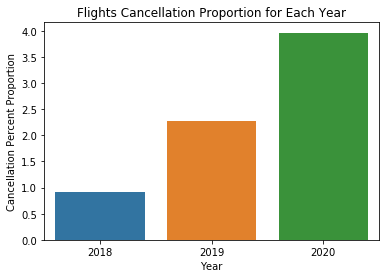

In [8]:
# Find the proportion of cancelled flights for each year
arr_cancelled_prop = []
for year in range(2018,2021,1):
  total_cancelled = df_canelled[df_canelled.year == year].shape[0]
  total_flights = total_cancelled + df[df.year == year].shape[0]
  cancellation_proportion = total_cancelled/total_flights * 100
  
  arr_cancelled_prop.append({'year':year,
                              'cancellation_proportion':cancellation_proportion
                            })

frame_cancelled_prop = pd.DataFrame(arr_cancelled_prop)
sb.barplot(data=frame_cancelled_prop,x= 'year',y='cancellation_proportion');

plt.xlabel('Year');
plt.ylabel('Cancellation Percent Proportion');
plt.title('Flights Cancellation Proportion for Each Year');

## (Visualization 3)

###  What is the flights count for each carrier in each year?
> Interestingly, may 2018 and 2019 had nearly equal number of flights with respect to each carrier. Nevertheless, may 2020 had sharp decline in flights number. Actually the main reason is COVID-19 impact.

### How do the delay durations differ between the three carriers in each year?
> The delay duration versus the carrier and the year shows something enthralling! The average delay duration for each carrier was positive but in 2020. This means that the flights was departing earlier than the scheduled.(negative value means earlier departure)

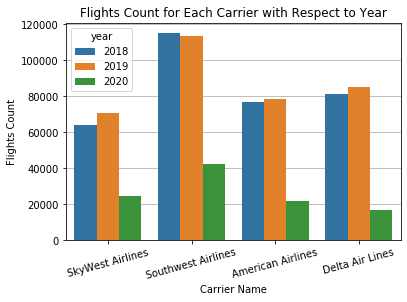

In [9]:
# Flights number for each carrier/year
sb.countplot(data=df, x='carrier', hue='year', zorder=2)
plt.xticks(rotation=15)
plt.xlabel('Carrier Name')
plt.ylabel('Flights Count')
plt.title('Flights Count for Each Carrier with Respect to Year')
plt.grid(axis='y' ,zorder=0)

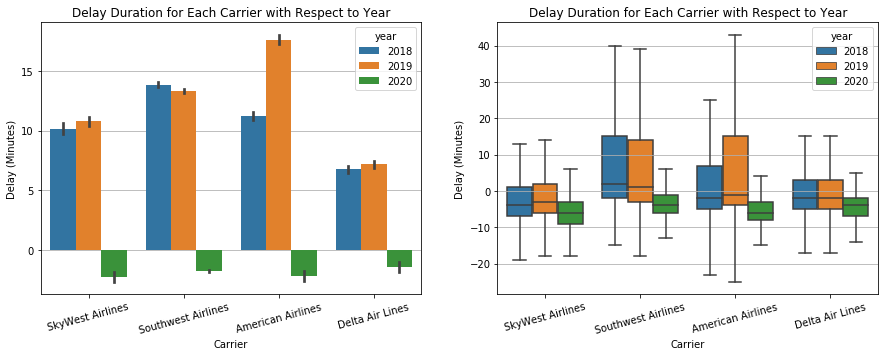

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.barplot(data=df, x='carrier', y='departure_delay', hue='year',zorder=2)
plt.xticks(rotation=15)
plt.grid(axis='y', zorder=0)
plt.xlabel('Carrier')
plt.ylabel('Delay (Minutes)')
plt.title('Delay Duration for Each Carrier with Respect to Year')

# Additional plot: Box plot
plt.subplot(1,2,2)
sb.boxplot(data=df, x='carrier', y='departure_delay', hue='year', showfliers = False);
plt.xticks(rotation=15);
plt.grid(axis='y');
plt.xlabel('Carrier');
plt.ylabel('Delay (Minutes)');
plt.title('Delay Duration for Each Carrier with Respect to Year');